# Plots to Compare Methods

In [1]:
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [2]:
directory_read_names = ''
line_chart = pd.read_excel (directory_read_names + 'Results_Clusters_updated_v2.xlsx',sheet_name = 'LinePlots')

In [3]:
line_chart['Training Algorithm'] = line_chart['Training Algorithm'].replace({
    'GD': 'LossS by GD',
    'GA': 'LossL by GA',
    'Bootstrap': 'Bootstrap'
})

line_chart

,PICP,MPIW,NMPIW,Training Algorithm
0,0.50,0.960000,0.240000,LossS by GD
1,0.50,1.237930,0.309482,LossL by GA
2,0.50,1.190000,0.297500,Bootstrap
3,0.75,2.280000,0.570000,LossS by GD
4,0.75,2.475901,0.618975,LossL by GA
5,0.75,2.890000,0.722500,Bootstrap
6,0.85,2.520000,0.630000,LossS by GD
7,0.85,3.026880,0.756720,LossL by GA
8,0.85,3.300000,0.825000,Bootstrap
9,0.95,3.140000,0.785000,LossS by GD


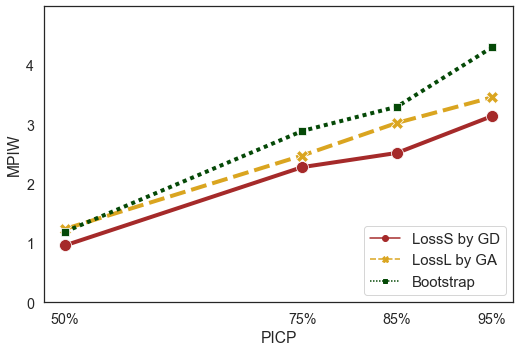

In [26]:
desired_dpi = 300

desired_width_px = 2249
desired_height_px = 2325

fig_width = desired_width_px / desired_dpi
fig_height = desired_height_px / (desired_dpi * 1.5)

fig, ax = plt.subplots(figsize=(fig_width, fig_height))

sns.set(style="white", font_scale=1.3, color_codes=True)

ax = sns.lineplot(data=line_chart, x="PICP", y="MPIW", hue="Training Algorithm", linewidth=4,
                  palette=["#A52A2A", "#DAA520", "#054907"], style="Training Algorithm", markers=True, markersize=12)

# Set legend size and position
legend = ax.legend(fontsize='15', bbox_to_anchor=(1, 0), loc='lower right')

ax.set_xticks([0.5, 0.75, 0.85, 0.95])
ax.set_xticklabels(['{:,.2%}'.format(x) for x in [0.5, 0.75, 0.85, 0.95]])

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))

ax.set_ylim(0, 4.99)

# Use tight_layout to improve layout
plt.tight_layout()

fig.savefig('GD_GA_Boot_March28.tif', dpi=desired_dpi,  format="tif",facecolor='white',pil_kwargs={"compression": "tiff_lzw"})
# plt.savefig('GD_GA_Boot_Nov20.png', dpi=desired_dpi, bbox_inches='tight')

plt.show()